In [15]:
# Importing libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [16]:
# Visualizing 6 decimals per value
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Reading data from csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

sensorama = load_dataset('sensorama_df.csv')

In [17]:
# Since odor name and canonical_smiles variables are strings, we change them to a numerical value
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['odor name'])
sensorama['odor name']=label_encoder.transform(sensorama['odor name'])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['canonical_smiles'])
sensorama['canonical_smiles']= label_encoder.transform(sensorama['canonical_smiles'])

In [18]:
# Normalizing function
def standarize(x_train):
    mean = x_train.mean()
    std = x_train.std()
    x_train -= mean
    x_train /= std

# Normalizing data
s= sensorama.columns
s=s.drop(['odor level', 'cid', 'canonical_smiles', 'odor name'])
for c in s:
    standarize(sensorama[c])
# After normalizing the data, we have NaNs values, so we change them to 0
sensorama=sensorama.fillna(0)

In [19]:
# Creating a new dataframe with only those molecules of odor level = 2
sensorama_2 = []
for i in range (0,17994):
    if sensorama.loc[i,'odor level'] == 2:
        sensorama_2.append(sensorama.loc[i,:])
sensorama_2 = pd.DataFrame(sensorama_2)

In [20]:
X = sensorama_2[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama_2['odor name']

### ALL ODOR NAMES 

#### RANDOM FOREST

Accuracy:  10.267857142857142 %


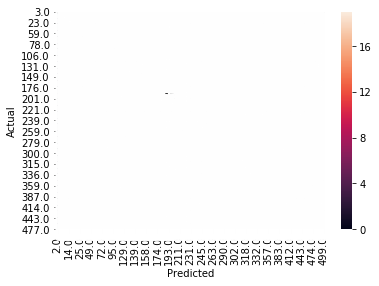

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

11
12
44
51
52
53
54
55
56
70
72
73
77
83
88
89
90
91
92
93
94
95
96
97
102
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
121
122
123
124
125
126
127
128
129
203
204


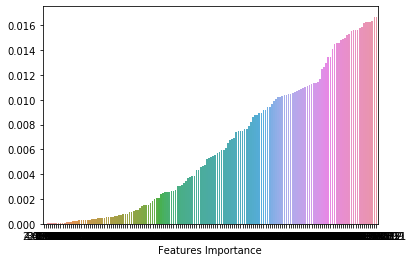

In [23]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [24]:
X = sensorama_2[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12','mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
                 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn','khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 
                 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl',
               'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama_2['odor name']

Accuracy:  11.049107142857142 %


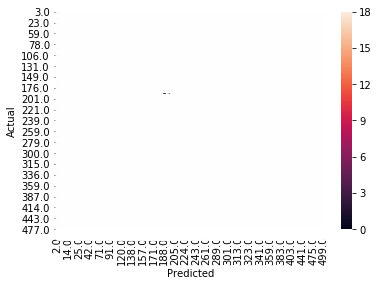

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHIN

##### rbf Kernel 

In [28]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 12.388392857142858 %


##### Polynomial Kernel 

In [29]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 11.272321428571429 %


##### Sigmoid Kernel 

In [30]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 10.9375 %


#### DECISION TREE

In [31]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 8.279069767441861 %


#### LOGISTIC REGRESSION

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  13.392857142857142 %


#### K-Nearest Neighbor

Text(0, 0.5, 'Accuracy')

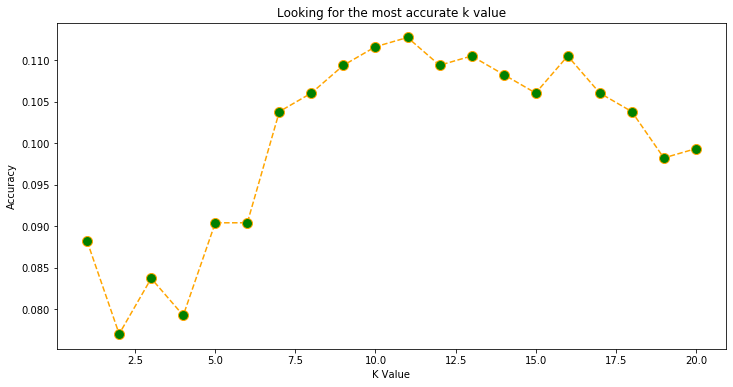

In [33]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [35]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 11.272321428571429 %


### 25 MOST COMMON ODOR NAMES 

In [48]:
sensorama_2 = sensorama_2 .sort_values('odor name')

In [49]:
sensorama2_2=[]

for i in range(26, len(sensorama_2)-26):
    if sensorama_2.iloc[i,4] == sensorama_2.iloc[i+26,4] or sensorama_2.iloc[i,4] == sensorama_2.iloc[i-26,4]:
        sensorama2_2.append(sensorama_2.iloc[i,:]) 

sensorama2_2= pd.DataFrame(sensorama2_2)
sensorama2_2

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
16260,6437982.000000,995.000000,0.485768,2.000000,9.000000,-0.207567,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.343122,-0.191468,0.438469,0.000000,0.000000,0.427016,0.757586,0.483747,0.405517,-0.161598
16048,6436727.000000,1421.000000,0.277209,2.000000,17.000000,0.354017,0.200130,-0.631781,0.632666,-0.644741,...,0.808417,1.297946,1.181228,0.000000,0.000000,1.248497,1.246812,1.078802,1.166037,-0.161598
2266,8698.000000,2991.000000,0.694326,2.000000,17.000000,-1.030100,0.200130,1.183366,0.632666,1.285620,...,0.162778,0.192054,-0.198182,0.000000,0.000000,-0.085568,0.068507,-0.171621,0.212747,-0.161598
17578,21909238.000000,595.000000,0.833366,2.000000,17.000000,0.728406,-0.878056,-0.631781,-1.106175,-0.644741,...,0.532007,0.433022,0.862903,0.000000,0.000000,0.702711,0.622061,0.337959,0.378128,-0.161598
11481,196435.000000,1108.000000,1.180964,2.000000,17.000000,1.352513,2.356503,-0.631781,0.632666,-0.644741,...,2.190468,2.210743,1.393445,0.000000,0.000000,1.386350,0.746830,0.471867,0.943222,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11193,164422.000000,1991.000000,0.694326,2.000000,494.000000,1.352513,0.200130,-0.631781,0.632666,-0.644741,...,1.191342,1.345286,1.605662,0.000000,0.000000,1.425175,0.732188,0.455791,0.982192,-0.161598
17686,44145813.000000,1502.000000,0.207689,2.000000,494.000000,0.776702,3.434689,-0.631781,0.632666,-0.644741,...,1.176623,1.105385,0.544577,0.000000,0.000000,0.608945,0.166352,-0.091589,0.426455,-0.161598
2933,11230.000000,1364.000000,-0.417987,2.000000,494.000000,0.603735,0.200130,-0.631781,0.632666,-0.644741,...,0.209187,-0.623930,0.014035,0.000000,0.000000,-0.074694,0.070173,-0.170299,-0.264264,-0.161598
8931,92138.000000,310.000000,1.111444,2.000000,494.000000,0.354017,0.200130,-0.631781,0.632666,-0.644741,...,1.637647,1.586254,1.393445,0.000000,0.000000,1.386350,0.868477,0.609178,1.168622,-0.161598


In [50]:
count=0
for i in range(1, len(sensorama2_2)):
    if sensorama2_2.iloc[i,4]!= sensorama2_2.iloc[i-1,4]:
        count = count +1
print(count)

26


In [51]:
X = sensorama2_2[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_2['odor name']

#### RANDOM FOREST

Accuracy:  24.63054187192118 %


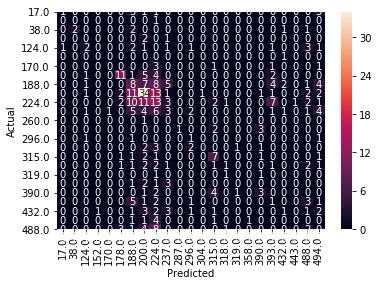

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

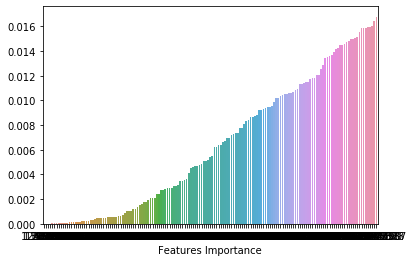

In [53]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [54]:
X = sensorama2_2[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12','mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
                 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn','khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 
                 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl',
               'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_2['odor name']

Accuracy:  24.137931034482758 %


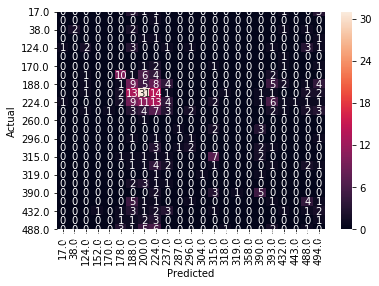

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHIN

##### rbf Kernel 

In [56]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 22.660098522167488 %


##### Polynomial Kernel 

In [57]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 21.921182266009854 %


##### Sigmoid Kernel 

In [58]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 19.458128078817737 %


#### DECISION TREE

In [59]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 16.427104722792606 %


#### LOGISTIC REGRESSION

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  23.645320197044335 %


#### K-Nearest Neighbor

Text(0, 0.5, 'Accuracy')

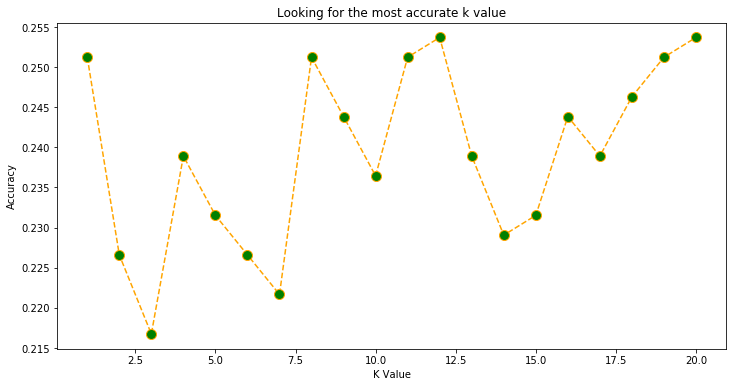

In [61]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [62]:
clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 25.36945812807882 %


### 15 MOST COMMON ODOR NAMES 

In [63]:
sensorama_2 = sensorama_2 .sort_values('odor name')

In [72]:
sensorama2_2=[]

for i in range(39, len(sensorama_2)-39):
    if sensorama_2.iloc[i,4] == sensorama_2.iloc[i+39,4] or sensorama_2.iloc[i,4] == sensorama_2.iloc[i-39,4]:
        sensorama2_2.append(sensorama_2.iloc[i,:]) 

sensorama2_2= pd.DataFrame(sensorama2_2)
sensorama2_2

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
9440,101330.000000,190.000000,0.972405,2.000000,38.000000,-0.663573,1.278317,1.183366,2.371507,1.285620,...,1.313791,1.376005,0.332360,0.000000,0.000000,0.499043,0.045260,-0.190006,0.784979,-0.161598
13512,3656473.000000,1067.000000,1.320003,2.000000,38.000000,-0.103487,3.434689,1.183366,2.371507,1.285620,...,2.696354,1.488892,1.605662,0.000000,0.000000,1.877185,0.789785,0.519596,2.027032,-0.161598
5888,61046.000000,1781.000000,0.902885,2.000000,38.000000,-1.730583,1.278317,2.998513,2.371507,3.215981,...,1.790060,1.681453,0.862903,0.000000,0.000000,1.281710,-0.007965,-0.231176,2.306334,-0.161598
10395,111255.000000,1070.000000,-0.139908,2.000000,38.000000,1.352513,2.356503,-0.631781,0.632666,-0.644741,...,1.421854,-0.047847,0.756794,0.000000,0.000000,0.647760,-0.419538,-0.506471,0.262481,-0.161598
5433,31408.000000,1044.000000,-0.487506,2.000000,124.000000,0.671873,2.356503,-0.631781,0.632666,-0.644741,...,0.209699,-0.143594,0.120143,0.000000,0.000000,0.107235,-0.239878,-0.395674,-0.071592,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16941,10857465.000000,1106.000000,1.320003,2.000000,494.000000,1.352513,2.356503,-0.631781,0.632666,-0.644741,...,2.743288,2.643205,1.711771,0.000000,0.000000,1.706131,0.889087,0.633102,1.246660,-0.161598
833,7136.000000,538.000000,-0.348467,2.000000,494.000000,-1.455407,0.200130,1.183366,0.632666,1.285620,...,0.914932,1.248991,0.014035,0.000000,0.000000,0.179262,-0.766160,-0.679153,0.642878,-0.161598
15159,5372174.000000,1409.000000,0.346729,2.000000,494.000000,0.015569,0.200130,-0.631781,0.632666,-0.644741,...,1.084827,0.817610,0.862903,0.000000,0.000000,0.928716,0.706513,0.427834,0.922565,-0.161598
16923,10561017.000000,1034.000000,0.902885,2.000000,494.000000,1.352513,2.356503,-0.631781,2.371507,-0.644741,...,1.407135,0.240994,1.393445,0.000000,0.000000,1.386350,0.405067,0.121765,0.925667,-0.161598


In [73]:
count=0
for i in range(1, len(sensorama2_2)):
    if sensorama2_2.iloc[i,4]!= sensorama2_2.iloc[i-1,4]:
        count = count +1
print(count)

15


In [74]:
X = sensorama2_2[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_2['odor name']

#### RANDOM FOREST

Accuracy:  32.50773993808049 %


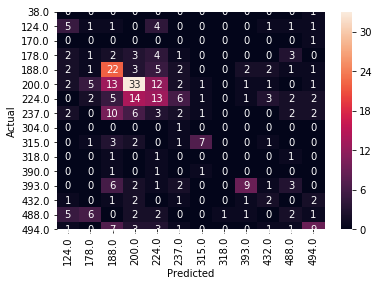

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

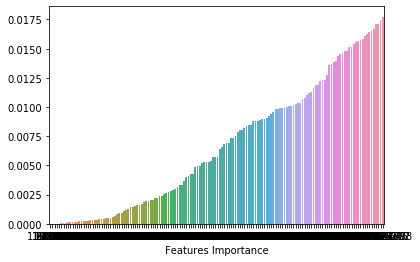

In [76]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [77]:
X = sensorama2_2[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12','mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
                 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn','khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 
                 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl',
               'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_2['odor name']

Accuracy:  32.50773993808049 %


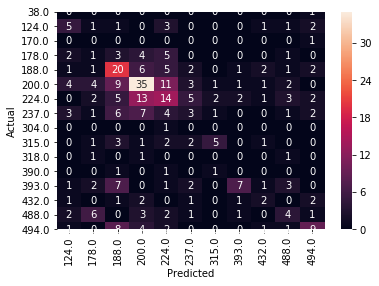

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHIN

##### rbf Kernel 

In [79]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 31.57894736842105 %


##### Polynomial Kernel 

In [80]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 28.173374613003094 %


##### Sigmoid Kernel 

In [81]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 26.93498452012384 %


#### DECISION TREE

In [82]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 27.577319587628867 %


#### LOGISTIC REGRESSION

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  30.340557275541798 %


#### K-Nearest Neighbor

Text(0, 0.5, 'Accuracy')

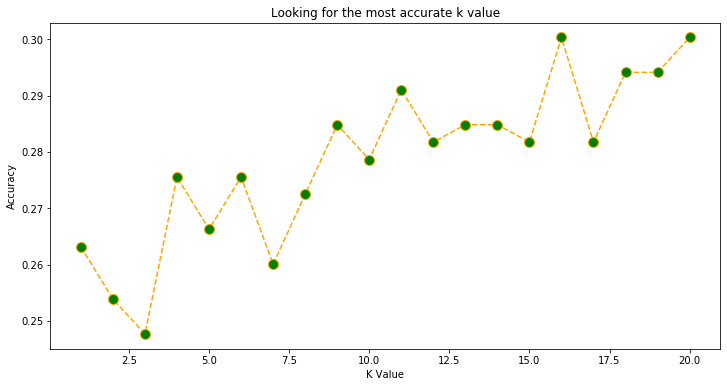

In [84]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [85]:
clf = KNeighborsClassifier(n_neighbors=16)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 30.030959752321984 %


### 10 MOST COMMON ODOR NAMES 

In [48]:
sensorama_2 = sensorama_2 .sort_values('odor name')

In [88]:
sensorama2_2=[]

for i in range(47, len(sensorama_2)-47):
    if sensorama_2.iloc[i,4] == sensorama_2.iloc[i+47,4] or sensorama_2.iloc[i,4] == sensorama_2.iloc[i-47,4]:
        sensorama2_2.append(sensorama_2.iloc[i,:]) 

sensorama2_2= pd.DataFrame(sensorama2_2)
sensorama2_2

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
5433,31408.000000,1044.000000,-0.487506,2.000000,124.000000,0.671873,2.356503,-0.631781,0.632666,-0.644741,...,0.209699,-0.143594,0.120143,0.000000,0.000000,0.107235,-0.239878,-0.395674,-0.071592,-0.161598
5165,29096.000000,1004.000000,0.068650,2.000000,124.000000,0.603735,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.757737,-0.623930,0.226252,0.000000,0.000000,0.063158,0.231721,-0.035719,-0.180573,-0.161598
13918,5317319.000000,380.000000,2.362796,2.000000,124.000000,-0.644105,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.112609,0.048967,1.075120,0.000000,0.000000,1.165596,2.127348,2.421322,1.297859,-0.161598
9553,102820.000000,1921.000000,-0.000869,2.000000,124.000000,0.936567,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.205953,-0.384029,0.014035,0.000000,0.000000,-0.173721,0.242547,-0.026278,-0.483305,-0.161598
15352,5702654.000000,2589.000000,0.207689,2.000000,124.000000,0.229345,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.895942,-0.623930,0.014035,0.000000,0.000000,-0.074694,0.544201,0.257949,-0.175155,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,61096.000000,2895.000000,0.763846,2.000000,494.000000,1.012193,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.343633,-0.287748,0.650686,0.000000,0.000000,0.465831,0.966323,0.724451,0.128970,-0.161598
4962,25325.000000,201.000000,0.485768,2.000000,494.000000,1.012193,1.278317,-0.631781,0.632666,-0.644741,...,0.439700,0.240461,0.226252,0.000000,0.000000,0.190136,0.274815,0.002167,-0.097791,-0.161598
611,6654.000000,1398.000000,-0.000869,2.000000,494.000000,0.603735,2.356503,-0.631781,0.632666,-0.644741,...,-0.250814,-0.960111,-0.304291,0.000000,0.000000,-0.295448,0.294106,0.019403,-0.498805,-0.161598
7890,74879.000000,1234.000000,0.833366,2.000000,494.000000,-0.519433,0.200130,1.183366,0.632666,1.285620,...,1.223032,1.537847,0.650686,0.000000,0.000000,0.790874,0.526228,0.239868,0.957309,-0.161598


In [89]:
count=0
for i in range(1, len(sensorama2_2)):
    if sensorama2_2.iloc[i,4]!= sensorama2_2.iloc[i-1,4]:
        count = count +1
print(count)

10


In [92]:
X = sensorama2_2[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_2['odor name']

#### RANDOM FOREST

Accuracy:  30.47945205479452 %


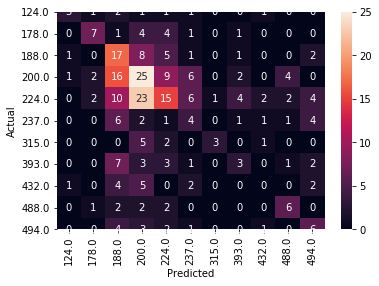

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

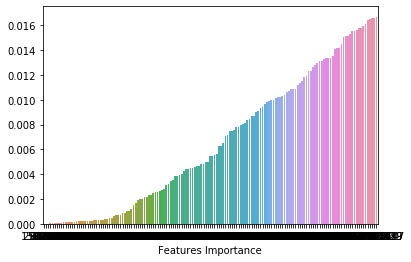

In [95]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [96]:
X = sensorama2_2[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12','mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
                 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn','khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 
                 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl',
               'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_2['odor name']

Accuracy:  30.47945205479452 %


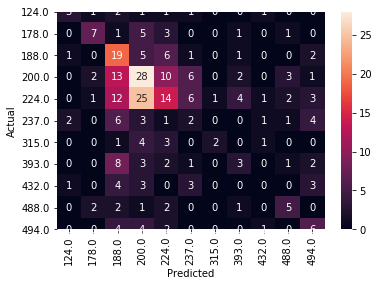

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHIN

##### rbf Kernel 

In [98]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 34.24657534246575 %


##### Polynomial Kernel 

In [99]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 28.424657534246577 %


##### Sigmoid Kernel 

In [100]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 27.054794520547947 %


#### DECISION TREE

In [101]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 23.931623931623932 %


#### LOGISTIC REGRESSION

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  29.10958904109589 %


#### K-Nearest Neighbor

Text(0, 0.5, 'Accuracy')

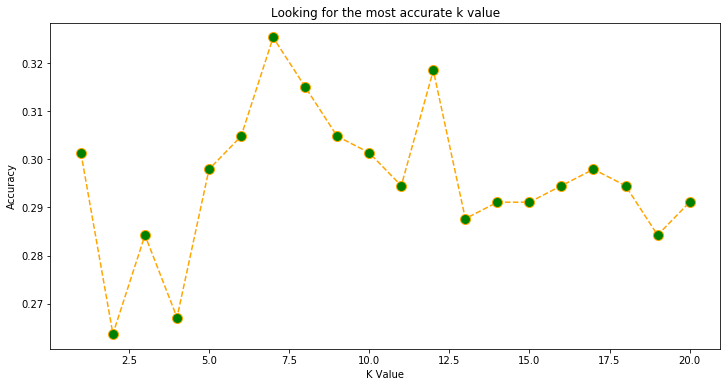

In [103]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [104]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 32.534246575342465 %


### 7 MOST COMMON ODOR NAMES 

In [105]:
sensorama_2 = sensorama_2 .sort_values('odor name')

In [110]:
sensorama2_2=[]

for i in range(65, len(sensorama_2)-65):
    if sensorama_2.iloc[i,4] == sensorama_2.iloc[i+65,4] or sensorama_2.iloc[i,4] == sensorama_2.iloc[i-65,4]:
        sensorama2_2.append(sensorama_2.iloc[i,:]) 

sensorama2_2= pd.DataFrame(sensorama2_2)
sensorama2_2

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
4210,17691.000000,1252.000000,-1.599820,2.000000,178.000000,-0.519433,0.200130,-0.631781,0.632666,-0.644741,...,-1.402864,-1.488854,-1.471484,0.000000,0.000000,-1.491672,-0.907376,-0.734004,-1.521183,-0.161598
4402,19695.000000,3199.000000,-0.209428,2.000000,178.000000,1.352513,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.481838,0.192054,0.226252,0.000000,0.000000,-0.035869,-0.215382,-0.379447,-0.361409,-0.161598
16310,6438193.000000,2654.000000,0.416248,2.000000,178.000000,0.104674,-0.878056,-0.631781,-1.106175,-0.644741,...,-1.057075,-0.791999,-0.410399,0.000000,0.000000,-0.432598,0.677645,0.396756,-0.479045,-0.161598
4387,19603.000000,2706.000000,1.320003,2.000000,178.000000,-0.008766,0.200130,1.183366,0.632666,1.285620,...,-0.757737,-0.479776,0.120143,0.000000,0.000000,0.107235,0.422554,0.138405,0.113954,-0.161598
16120,6437178.000000,2603.000000,2.571355,2.000000,178.000000,-1.252113,1.278317,2.998513,2.371507,3.215981,...,2.995816,3.354966,2.560639,0.000000,0.000000,3.107314,1.868093,1.989790,4.161244,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11097,162481.000000,1563.000000,-0.000869,2.000000,494.000000,1.040647,3.434689,-0.631781,0.632666,-0.644741,...,0.577905,0.144714,0.226252,0.000000,0.000000,0.289164,-0.063757,-0.272965,-0.021781,-0.161598
15817,6432308.000000,1272.000000,1.041924,2.000000,494.000000,0.354017,1.278317,-0.631781,0.632666,-0.644741,...,1.269441,1.202199,1.075120,0.000000,0.000000,1.165596,1.630698,1.621174,0.993237,-0.161598
442,6027.000000,148.000000,-3.685407,2.000000,494.000000,1.352513,0.200130,-0.631781,0.632666,-0.644741,...,0.743848,-0.337409,-0.940942,0.000000,0.000000,-1.204142,-3.089182,-0.440455,-1.464645,-0.161598
11089,162476.000000,533.000000,-0.557026,2.000000,494.000000,0.416540,0.200130,-0.631781,0.632666,-0.644741,...,0.347392,0.864950,0.650686,0.000000,0.000000,0.592819,-0.441397,-0.518958,0.382584,-0.161598


In [111]:
count=0
for i in range(1, len(sensorama2_2)):
    if sensorama2_2.iloc[i,4]!= sensorama2_2.iloc[i-1,4]:
        count = count +1
print(count)

7


In [112]:
X = sensorama2_2[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_2['odor name']

#### RANDOM FOREST

Accuracy:  38.32599118942731 %


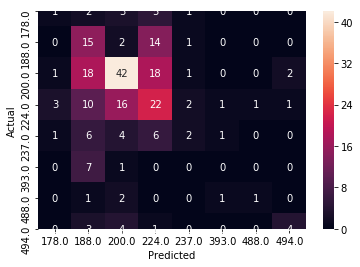

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

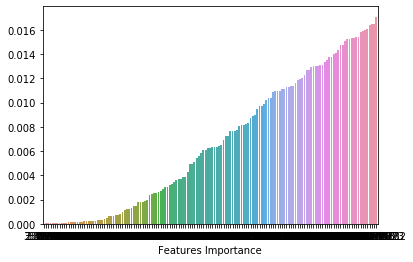

In [114]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [115]:
X = sensorama2_2[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12','mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
                 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn','khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 
                 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl',
               'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_2['odor name']

Accuracy:  38.76651982378855 %


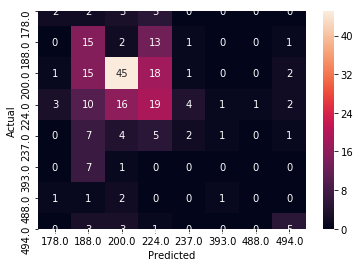

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHIN

##### rbf Kernel 

In [117]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 38.76651982378855 %


##### Polynomial Kernel 

In [118]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 34.36123348017621 %


##### Sigmoid Kernel 

In [119]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 32.158590308370044 %


#### DECISION TREE

In [120]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 32.234432234432234 %


#### LOGISTIC REGRESSION

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  39.647577092511014 %


#### K-Nearest Neighbor

Text(0, 0.5, 'Accuracy')

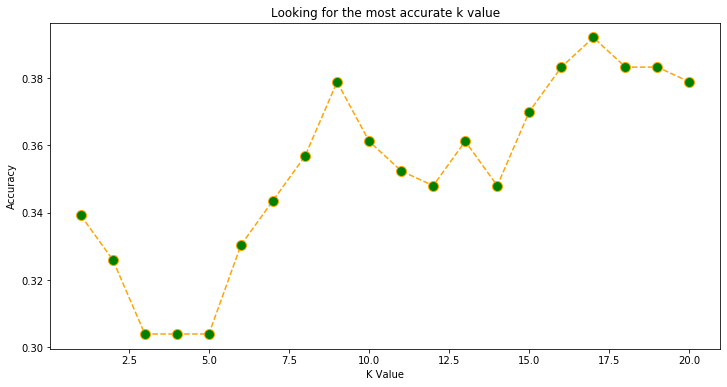

In [122]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [123]:
clf = KNeighborsClassifier(n_neighbors=17)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 39.20704845814978 %


### 5 MOST COMMON ODOR NAMES 

In [48]:
sensorama_2 = sensorama_2 .sort_values('odor name')

In [126]:
sensorama2_2=[]

for i in range(87, len(sensorama_2)-87):
    if sensorama_2.iloc[i,4] == sensorama_2.iloc[i+87,4] or sensorama_2.iloc[i,4] == sensorama_2.iloc[i-87,4]:
        sensorama2_2.append(sensorama_2.iloc[i,:]) 

sensorama2_2= pd.DataFrame(sensorama2_2)
sensorama2_2

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
4210,17691.000000,1252.000000,-1.599820,2.000000,178.000000,-0.519433,0.200130,-0.631781,0.632666,-0.644741,...,-1.402864,-1.488854,-1.471484,0.000000,0.000000,-1.491672,-0.907376,-0.734004,-1.521183,-0.161598
10733,118928.000000,517.000000,0.624807,2.000000,178.000000,0.331554,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.757737,-0.479776,0.332360,0.000000,0.000000,0.245087,0.538927,0.252626,0.047569,-0.161598
9201,95397.000000,2796.000000,1.389522,2.000000,188.000000,1.352513,0.200130,-0.631781,0.632666,-0.644741,...,-0.113121,0.000560,1.287337,0.000000,0.000000,1.105394,1.161319,0.967041,0.686167,-0.161598
14459,5362819.000000,2091.000000,-0.904624,2.000000,188.000000,-0.252119,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.942351,-0.864364,-0.834833,0.000000,0.000000,-0.951136,-0.580809,-0.593549,-1.006739,-0.161598
8897,91497.000000,1710.000000,1.389522,2.000000,188.000000,0.104674,2.356503,1.183366,0.632666,1.285620,...,3.480211,2.595332,1.711771,0.000000,0.000000,1.932136,0.845231,0.582425,1.988978,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15650,6428289.000000,1049.000000,-0.487506,2.000000,494.000000,1.352513,2.356503,-0.631781,0.632666,-0.644741,...,0.301495,-0.384029,0.014035,0.000000,0.000000,-0.074694,-0.376376,-0.481181,-0.444439,-0.161598
9829,106673.000000,1503.000000,1.180964,2.000000,494.000000,1.352513,3.434689,-0.631781,2.371507,-0.644741,...,1.775852,0.817610,1.711771,0.000000,0.000000,1.706131,0.967155,0.725448,1.236250,-0.161598
17466,19693163.000000,834.000000,8.550039,2.000000,494.000000,0.936567,-0.878056,-0.631781,-1.106175,-0.644741,...,3.479700,4.324099,8.396606,0.000000,0.000000,8.322480,7.926577,19.983361,7.840372,-0.161598
10750,119831.000000,1651.000000,0.555287,2.000000,494.000000,0.853452,3.434689,-0.631781,0.632666,-0.644741,...,2.789186,1.970309,1.181228,0.000000,0.000000,1.248497,0.434698,0.150036,0.902361,-0.161598


In [127]:
count=0
for i in range(1, len(sensorama2_2)):
    if sensorama2_2.iloc[i,4]!= sensorama2_2.iloc[i-1,4]:
        count = count +1
print(count)

5


In [128]:
X = sensorama2_2[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_2['odor name']

#### RANDOM FOREST

Accuracy:  43.54838709677419 %


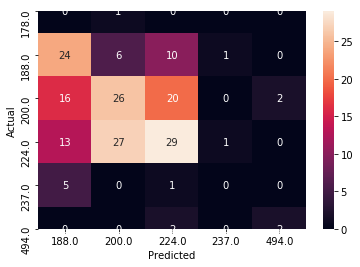

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

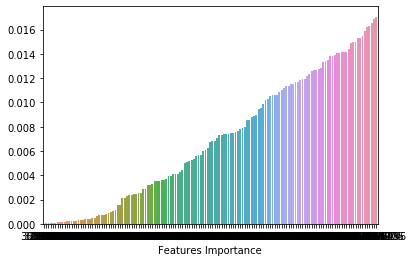

In [130]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [131]:
X = sensorama2_2[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12','mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
                 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn','khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 
                 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl',
               'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_2['odor name']

Accuracy:  41.39784946236559 %


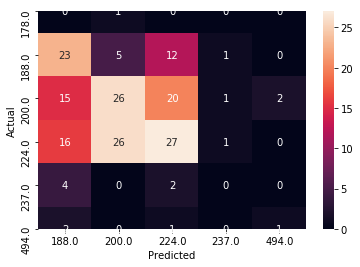

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHIN

##### rbf Kernel 

In [133]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 41.39784946236559 %


##### Polynomial Kernel 

In [134]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 38.70967741935484 %


##### Sigmoid Kernel 

In [135]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 42.473118279569896 %


#### DECISION TREE

In [136]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 42.600896860986545 %


#### LOGISTIC REGRESSION

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  40.86021505376344 %


#### K-Nearest Neighbor

Text(0, 0.5, 'Accuracy')

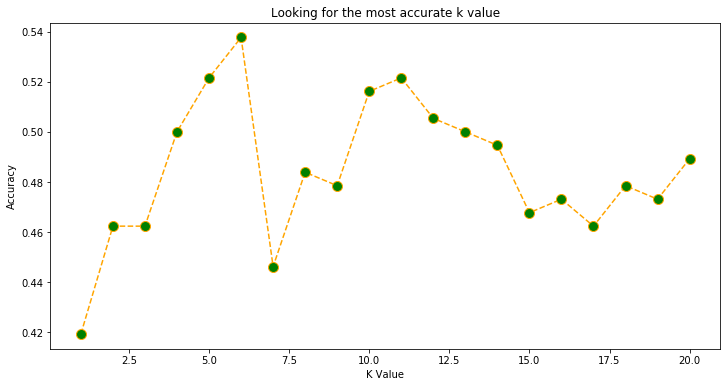

In [138]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [139]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 53.76344086021505 %


### 3 MOST COMMON ODOR NAMES 

In [140]:
sensorama_2 = sensorama_2 .sort_values('odor name')

In [145]:
sensorama2_2=[]

for i in range(109, len(sensorama_2)-109):
    if sensorama_2.iloc[i,4] == sensorama_2.iloc[i+109,4] or sensorama_2.iloc[i,4] == sensorama_2.iloc[i-109,4]:
        sensorama2_2.append(sensorama_2.iloc[i,:]) 

sensorama2_2= pd.DataFrame(sensorama2_2)
sensorama2_2

,cid,canonical_smiles,xlogp,odor level,odor name,fsp3,small rings,arom rings,ring blocks,arom blocks,...,atsm4,atsm5,natom,arom bond,arom atom,apol,alogp,alogp2,amr,acid
9643,103607.000000,1416.000000,0.555287,2.000000,188.000000,0.104674,0.200130,-0.631781,0.632666,-0.644741,...,1.223032,1.345819,1.287337,0.000000,0.000000,1.331399,0.786593,0.516018,1.301674,-0.161598
9197,95395.000000,165.000000,-0.487506,2.000000,188.000000,-0.663573,1.278317,1.183366,2.371507,1.285620,...,0.454418,0.720249,0.332360,0.000000,0.000000,0.499043,-0.580393,-0.593332,0.797031,-0.161598
11999,518810.000000,2264.000000,-0.487506,2.000000,188.000000,0.884527,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.250289,0.177321,-0.198182,0.000000,0.000000,-0.193733,-0.399831,-0.495023,-0.268583,-0.161598
11548,221641.000000,3042.000000,-0.000869,2.000000,188.000000,-1.030100,0.200130,1.183366,0.632666,1.285620,...,-0.067223,0.144180,-0.198182,0.000000,0.000000,-0.085568,-0.223918,-0.385127,0.209358,-0.161598
11323,172501.000000,778.000000,0.763846,2.000000,188.000000,1.352513,-0.878056,-0.631781,-1.106175,-0.644741,...,-0.619532,-0.191468,0.756794,0.000000,0.000000,0.520782,0.851892,0.590067,0.111762,-0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,16296.000000,2966.000000,1.111444,2.000000,224.000000,-0.831300,0.200130,1.183366,0.632666,1.285620,...,0.300983,0.336208,0.120143,0.000000,0.000000,0.234213,0.385081,0.102914,0.513791,-0.161598
8065,78476.000000,149.000000,-1.113183,2.000000,224.000000,-0.689781,1.278317,1.183366,2.371507,1.285620,...,0.561458,0.144180,-0.092074,0.000000,0.000000,-0.002667,-1.278424,-0.835326,0.265510,-0.161598
5081,27440.000000,2042.000000,-0.417987,2.000000,224.000000,-0.519433,0.200130,1.183366,0.632666,1.285620,...,-0.733731,-1.248419,-1.259267,0.000000,0.000000,-1.092173,-0.837844,-0.708117,-0.895207,-0.161598
9387,100941.000000,1088.000000,1.250483,2.000000,494.000000,1.132372,4.512876,-0.631781,0.632666,-0.644741,...,3.480211,3.027260,1.711771,0.000000,0.000000,1.833109,0.309997,0.033722,1.434504,-0.161598


In [146]:
count=0
for i in range(1, len(sensorama2_2)):
    if sensorama2_2.iloc[i,4]!= sensorama2_2.iloc[i-1,4]:
        count = count +1
print(count)

3


In [147]:
X = sensorama2_2[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_2['odor name']

#### RANDOM FOREST

Accuracy:  51.829268292682926 %


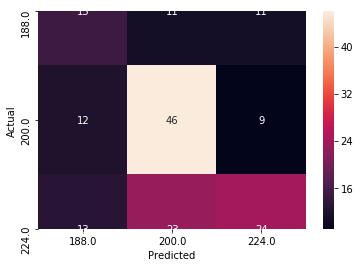

In [148]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

##### Feature Importances 

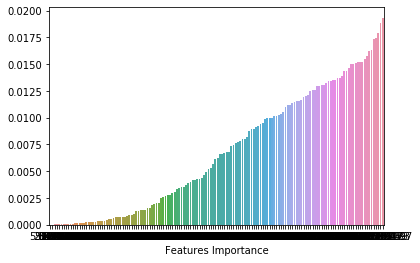

In [149]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sns.barplot(x=round(featureImportances,8), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [150]:
X = sensorama2_2[[ 'xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7','tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12','mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 
                 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh2', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn','khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn','khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 
                 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl',
               'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom', 'apol','alogp', 'alogp2', 'amr', 'acid']]
y = sensorama2_2['odor name']

Accuracy:  52.4390243902439 %


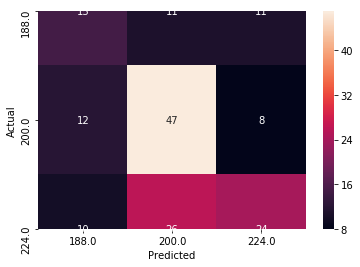

In [151]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
plt.show()

#### SUPPORT VECTOR MACHIN

##### rbf Kernel 

In [152]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='rbf') # creating Support Vector Machine model
clf.fit(X_tr, y_tr) # training the Model
y_pr = clf.predict(X_tst) # making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 48.78048780487805 %


##### Polynomial Kernel 

In [153]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf = svm.SVC(kernel='poly') # Creating Support Vector Machine Model
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 44.51219512195122 %


##### Sigmoid Kernel 

In [154]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=25/100,random_state=109)
clf=svm.SVC(kernel='sigmoid') # instantiate classifier with sigmoid kernel
clf.fit(X_tr,y_tr) # fit classifier to training set
y_pr = clf.predict(X_tst) # Making Predictions

# Evaluating Prediction Accuracy
print("Accuracy:",metrics.accuracy_score(y_tst, y_pr)*100,"%")

Accuracy: 43.90243902439025 %


#### DECISION TREE

In [155]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred = clf.predict(X_test) # Predict the response for test dataset

# how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 49.23857868020304 %


#### LOGISTIC REGRESSION

In [156]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
clf= LogisticRegression( max_iter=100000000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')

Accuracy:  54.268292682926834 %


#### K-Nearest Neighbor

Text(0, 0.5, 'Accuracy')

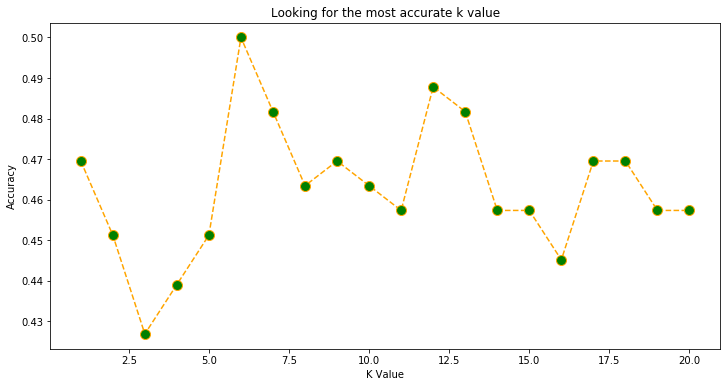

In [158]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [160]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 50.0 %
